In [ ]:
import cv2
import numpy as np
import types
from IPython.display import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# from google.colab.patches import cv2_imshow 

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

In [ ]:
def hideData(image, secret_message):

  
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" 

  data_index = 0
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) 
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel)
          if data_index < data_len:
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index >= data_len:
              break

  return image


In [ ]:
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(image_name) 
  
  print("The shape of the image is: ",image.shape) 
  print("The original image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500)) 
  imgplot = plt.imshow(resized_image)
  plt.grid(False)
  plt.axis('off')
  plt.show()
  
  data = input("Enter data to be encoded : ") 
  if (len(data) == 0): 
    raise ValueError('Data is empty')
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) 
  cv2.imwrite(filename, encoded_image)


In [ ]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) 
          binary_data += r[-1]
          binary_data += g[-1] 
          binary_data += b[-1] 
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": 
          break
  return decoded_data[:-5] 

In [ ]:
def decode_text():
  image_name = input("Enter the name of the steganographed image that you want to decode (with extension): ") 
  image = cv2.imread(image_name)  

  print("\nThe Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))  
  imgplot = plt.imshow(resized_image)
  plt.grid(False)
  plt.axis('off')
  plt.show()    
  text = showData(image)
  return text

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding....
Enter image name(with extension): 7112.png
The shape of the image is:  (150, 200, 3)
The original image is as shown below: 


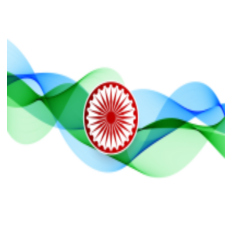

Enter data to be encoded : China
Enter the name of new encoded image(with extension): my.png
Maximum bytes to encode: 11250


In [ ]:
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("\nDecoded message is " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 
          
Steganography() 

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Enter the name of the steganographed image that you want to decode (with extension): my.png

The Steganographed image is as shown below: 


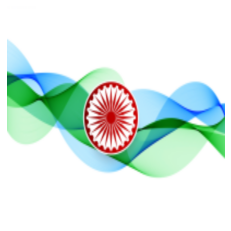


Decoded message is China


In [ ]:
Steganography()